# Práctica 3 - Probabilistic Models and Ensembles

### Alumnos:
- Javier Pérez Vargas
- Mario Ruiz Vaquett
- Gonzalo Lope Carrasco

#### Import libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Split the data

In [46]:
test = pd.read_csv('test.csv', index_col=0)
train = pd.read_csv('train.csv', index_col=0)
Y_train = train['class']
X_train = train.drop('class', axis=1)
X_test = test.drop('class',axis=1)
Y_test = test['class']

In [47]:
test.shape

(2000, 91)

In [48]:
train.head(3)

,lonsb,qpzkm,knyrk,dtymf,shmcy,udpkr,ryjkv,pswtk,onmrn,pxlhg,...,veogh,ageae,krdmr,yhiua,mhvay,uwwjo,bnnsl,wzdci,ycwtf,class
1,-2.724062,26.536867,-0.075150,0.926834,2.987854,3.135959,1.436290,-1.193564,7.250148,10.248741,...,0.075455,-0.026040,-1.130297,3.289482,-1.283407,14.068915,-0.081113,0.566962,-10.140168,2
2,-0.690392,-5.542998,-0.523969,0.834899,2.317522,0.359343,0.081809,-0.772035,1.944000,-0.499702,...,0.076026,0.088022,-1.408651,3.376790,-2.550178,-0.957806,0.697626,0.243532,-0.159568,0
3,-0.265749,-10.673678,-1.002556,-1.132291,-0.726886,0.071061,1.330116,-0.652022,0.984688,9.409884,...,0.042153,-0.034703,-0.584373,3.199650,-2.884921,-24.931739,-0.632660,0.309644,-7.490650,2


## Naive-Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [50]:
y_pred = gnb.fit(X_train, Y_train).predict(X_test)

print(f"Number of mislabeled points out of a total {X_train.shape[0]} points : {(Y_train != gnb.predict(X_train)).sum()}")
print(f"Accuracy: {gnb.score(X_train, Y_train)}")

print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(Y_test != gnb.predict(X_test)).sum()}")
print(f"Accuracy: {gnb.score(X_test, Y_test)}")

Number of mislabeled points out of a total 3000 points : 880
Accuracy: 0.7066666666666667
Number of mislabeled points out of a total 2000 points : 668
Accuracy: 0.666


#### ¿Variables redundantes? Eliminaremos aquellas que sean redundantes para ver si hay efecto.

In [51]:
corr = train.corr()
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if np.abs(corr.iloc[i,j]) > 0.5:
            print(f"{corr.columns[i]} - {corr.columns[j]}: {corr.iloc[i,j]}")

zrlch - jmurn: 0.9968154878518162
zrlch - qqxzm: 0.9946550784968101
jmurn - qqxzm: 0.9977987649277492


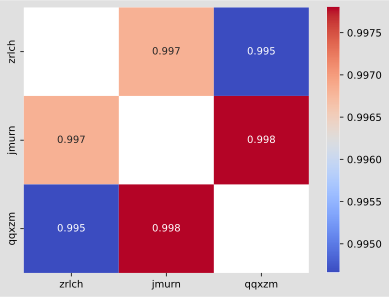

In [71]:
import seaborn as sns
vals1 = corr[(np.abs(corr) > 0.5) & (corr < 1)]
vals = vals1.dropna(axis=0, how='all').dropna(axis=1, how='all')
sns.heatmap(vals, annot=True, cmap='coolwarm', fmt=".3f")
plt.show()

#### Drop redundant variables

In [76]:
variables_to_drop = set()
corr = train.corr()

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if np.abs(corr.iloc[i,j]) > 0.1:
            variables_to_drop.add(corr.columns[i])

trainNB = train.drop(variables_to_drop, axis=1)
testNB = test.drop(variables_to_drop, axis=1)
X_trainNB = trainNB.drop('class', axis=1)
X_testNB = testNB.drop('class', axis=1)
Y_trainNB = trainNB['class']
Y_testNB = testNB['class']

In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_predNB = gnb.fit(X_trainNB, Y_trainNB).predict(X_testNB)

print(f"Number of mislabeled points out of a total {X_trainNB.shape[0]} points : {(Y_trainNB != gnb.predict(X_trainNB)).sum()}")
print(f"Accuracy: {gnb.score(X_trainNB, Y_trainNB)}")

print(f"Number of mislabeled points out of a total {X_testNB.shape[0]} points : {(Y_testNB != gnb.predict(X_testNB)).sum()}")
print(f"Accuracy: {gnb.score(X_testNB, Y_testNB)}")

Number of mislabeled points out of a total 3000 points : 886
Accuracy: 0.7046666666666667
Number of mislabeled points out of a total 2000 points : 650
Accuracy: 0.675


#### With a feature selector

##### Backward selection

In [55]:
from sklearn.feature_selection import SequentialFeatureSelector

gnb = GaussianNB()
sfs = SequentialFeatureSelector(gnb, direction='backward')
sfs.fit(X_train, Y_train)
print(sfs.n_features_to_select_)

45


In [56]:
# Transform data
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
Y_train_sfs = Y_train
Y_test_sfs = Y_test

# Train the model
gnb = GaussianNB()
y_pred_sfs = gnb.fit(X_train_sfs, Y_train_sfs).predict(X_test_sfs)

# Train accuracy
print(f"Number of mislabeled points out of a total {X_train_sfs.shape[0]} points : {(Y_train_sfs != gnb.predict(X_train_sfs)).sum()}")
print(f"Accuracy: {gnb.score(X_train_sfs, Y_train_sfs)}")

# Test accuracy
print(f"Number of mislabeled points out of a total {X_test_sfs.shape[0]} points : {(Y_test_sfs != gnb.predict(X_test_sfs)).sum()}")
print(f"Accuracy: {gnb.score(X_test_sfs, Y_test_sfs)}")

Number of mislabeled points out of a total 3000 points : 874
Accuracy: 0.7086666666666667
Number of mislabeled points out of a total 2000 points : 593
Accuracy: 0.7035


##### Forward selection

In [57]:
gnb = GaussianNB()
sfs = SequentialFeatureSelector(gnb, direction='forward',n_features_to_select='auto',tol=0.001)
sfs.fit(X_train, Y_train)
sfs.n_features_to_select_
train.columns[:-1][sfs.get_support()]

Index(['svpei', 'jygnb', 'hfkdr', 'tegac', 'opbjv', 'fygid'], dtype='object')

In [58]:
# Transform data
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
Y_train_sfs = Y_train
Y_test_sfs = Y_test

# Train the model
gnb = GaussianNB()
y_pred_sfs = gnb.fit(X_train_sfs, Y_train_sfs).predict(X_test_sfs)

# Train accuracy
print(f"Number of mislabeled points out of a total {X_train_sfs.shape[0]} points : {(Y_train_sfs != gnb.predict(X_train_sfs)).sum()}")
print(f"Accuracy: {gnb.score(X_train_sfs, Y_train_sfs)}")

# Test accuracy
print(f"Number of mislabeled points out of a total {X_test_sfs.shape[0]} points : {(Y_test_sfs != y_pred_sfs).sum()}")
print(f"Accuracy: {gnb.score(X_test_sfs, Y_test_sfs)}")

Number of mislabeled points out of a total 3000 points : 893
Accuracy: 0.7023333333333334
Number of mislabeled points out of a total 2000 points : 565
Accuracy: 0.7175


## Augmented Naive Bayes

In [ ]:
# !pip install pyagrum

In [60]:
import pyAgrum.skbn as skbn
import pyAgrum.lib.notebook as ntbk

In [61]:
BNTest= skbn.BNClassifier(learningMethod = 'NaiveBayes', prior= 'Smoothing', scoringType= "BIC", priorWeight = 1,
                          discretizationStrategy = 'quantile', usePR = False, significant_digit = 13, discretizationThreshold = 1)
BNTest.fit(X_train, Y_train)

print(f"Number of mislabeled points out of a total {X_train.shape[0]} points : {(Y_train != BNTest.predict(X_train)).sum()}")
print(f"Accuracy: {BNTest.score(X_train, Y_train)}")

print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(Y_test != BNTest.predict(X_test)).sum()}")
print(f"Accuracy: {BNTest.score(X_test, Y_test)}")

Number of mislabeled points out of a total 3000 points : 922
Accuracy: 0.6926666666666667
Number of mislabeled points out of a total 2000 points : 824
Accuracy: 0.588


In [62]:
ntbk.showBN(BNTest.bn)

In [63]:
BNTest= skbn.BNClassifier(learningMethod = 'TAN', prior= 'Smoothing', scoringType= "BIC", priorWeight = 0.5,
                          discretizationStrategy = 'quantile', usePR = False, significant_digit = 13, discretizationThreshold = 1)
BNTest.fit(X_train, Y_train)

print(f"Number of mislabeled points out of a total {X_train.shape[0]} points : {(Y_train != BNTest.predict(X_train)).sum()}")
print(f"Accuracy: {BNTest.score(X_train, Y_train)}")

print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(Y_test != BNTest.predict(X_test)).sum()}")
print(f"Accuracy: {BNTest.score(X_test, Y_test)}")

Number of mislabeled points out of a total 3000 points : 384
Accuracy: 0.872
Number of mislabeled points out of a total 2000 points : 825
Accuracy: 0.5875


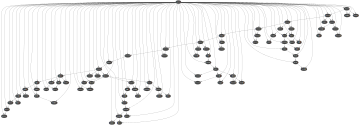

In [64]:
ntbk.showBN(BNTest.bn)

In [65]:
BNTest= skbn.BNClassifier(learningMethod = 'TAN', prior= 'Smoothing', scoringType= "BIC", priorWeight = 20,
                          discretizationStrategy = 'quantile', usePR = False, significant_digit = 13, discretizationThreshold = 1)
BNTest.fit(X_train, Y_train)

print(f"Number of mislabeled points out of a total {X_train.shape[0]} points : {(Y_train != BNTest.predict(X_train)).sum()}")
print(f"Accuracy: {BNTest.score(X_train, Y_train)}")

print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(Y_test != BNTest.predict(X_test)).sum()}")
print(f"Accuracy: {BNTest.score(X_test, Y_test)}")

Number of mislabeled points out of a total 3000 points : 458
Accuracy: 0.8473333333333334
Number of mislabeled points out of a total 2000 points : 750
Accuracy: 0.625


In [66]:
ntbk.showBN(BNTest.bn)

## Análisis Discriminante

### LDA

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
lda_model.fit(X_train, Y_train)

# Train accuracy
print(f"Number of mislabeled points out of a total {X_train.shape[0]} points : {(Y_train != lda_model.predict(X_train)).sum()}")
print(f"Accuracy: {lda_model.score(X_train, Y_train)}")

# Test accuracy
print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(Y_test != lda_model.predict(X_test)).sum()}")
print(f"Accuracy: {lda_model.score(X_test, Y_test)}")

Number of mislabeled points out of a total 3000 points : 1674
Accuracy: 0.442
Number of mislabeled points out of a total 2000 points : 1189
Accuracy: 0.4055


##### Forward selection

In [68]:
sfs = SequentialFeatureSelector(lda_model, direction='forward',n_features_to_select='auto',tol=0.001)
sfs.fit(X_train, Y_train)
print(sfs.n_features_to_select_)
print(train.columns[:-1][sfs.get_support()])

# Transform data
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
Y_train_sfs = Y_train
Y_test_sfs = Y_test

# Train the model
lda_model = LinearDiscriminantAnalysis(store_covariance=True)
y_pred_sfs = lda_model.fit(X_train_sfs, Y_train_sfs).predict(X_test_sfs)

# Train accuracy
print(f"Number of mislabeled points out of a total {X_train_sfs.shape[0]} points : {(Y_train_sfs != lda_model.predict(X_train_sfs)).sum()}")
print(f"Accuracy: {lda_model.score(X_train_sfs, Y_train_sfs)}")

# Test accuracy
print(f"Number of mislabeled points out of a total {X_test_sfs.shape[0]} points : {(Y_test_sfs != y_pred_sfs).sum()}")
print(f"Accuracy: {lda_model.score(X_test_sfs, Y_test_sfs)}")

2
Index(['exccb', 'vpqgg'], dtype='object')
Number of mislabeled points out of a total 3000 points : 1758
Accuracy: 0.414
Number of mislabeled points out of a total 2000 points : 1143
Accuracy: 0.4285


### QDA

In [69]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA_model = QuadraticDiscriminantAnalysis(store_covariance=True)
QDA_model.fit(X_train, Y_train)

# Train accuracy
print(f"Number of mislabeled points out of a total {X_train.shape[0]} points : {(Y_train != QDA_model.predict(X_train)).sum()}")
print(f"Accuracy: {QDA_model.score(X_train, Y_train)}")

# Test accuracy
print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(Y_test != QDA_model.predict(X_test)).sum()}")
print(f"Accuracy: {QDA_model.score(X_test, Y_test)}")

Number of mislabeled points out of a total 3000 points : 248
Accuracy: 0.9173333333333333
Number of mislabeled points out of a total 2000 points : 1033
Accuracy: 0.4835


##### Forward Selection

In [96]:
sfs_qda = SequentialFeatureSelector(QDA_model, direction='forward',n_features_to_select='auto',tol=0.001)
sfs_qda.fit(X_train, Y_train)

sfs_qda.n_features_to_select_

X_train_sfs_qda = sfs_qda.transform(X_train)
X_test_sfs_qda = sfs_qda.transform(X_test)
Y_train_sfs_qda = Y_train
Y_test_sfs_qda = Y_test

QDA_model = QuadraticDiscriminantAnalysis(store_covariance=True)
QDA_model.fit(X_train_sfs_qda, Y_train_sfs_qda)
y_pred_sfs_qda = QDA_model.predict(X_test_sfs_qda)

# Train accuracy
print(f"Number of mislabeled points out of a total {X_train_sfs_qda.shape[0]} points : {(Y_train_sfs_qda != QDA_model.predict(X_train_sfs_qda)).sum()}")
print(f"Accuracy: {QDA_model.score(X_train_sfs_qda, Y_train_sfs_qda)}")

# Test accuracy
print(f"Number of mislabeled points out of a total {X_test_sfs_qda.shape[0]} points : {(Y_test_sfs_qda != y_pred_sfs_qda).sum()}")
print(f"Accuracy: {QDA_model.score(X_test_sfs_qda, Y_test_sfs_qda)}")


Number of mislabeled points out of a total 3000 points : 649
Accuracy: 0.7836666666666666
Number of mislabeled points out of a total 2000 points : 385
Accuracy: 0.8075


In [98]:
sfs_qda.n_features_to_select_
train.columns[:-1][sfs_qda.get_support()]

Index(['jygnb', 'opbjv', 'kfcgs'], dtype='object')

##### ¿Matrices de covarianza?

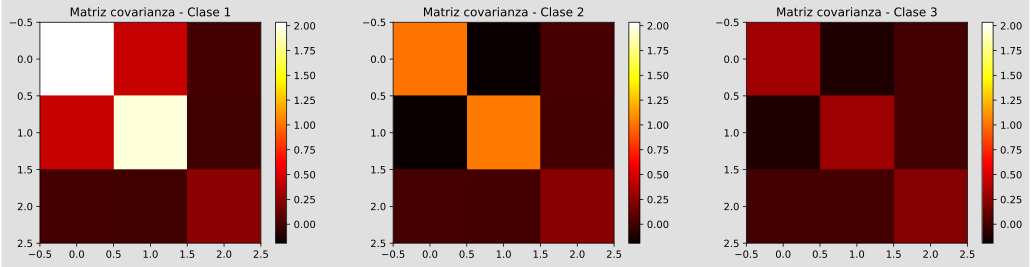

In [27]:
covariance_matrices = QDA_model.covariance_

cmap = 'hot'
vmin = min(np.min(matrix) for matrix in covariance_matrices)
vmax = max(np.max(matrix) for matrix in covariance_matrices)

plt.figure(figsize=(18, 4))
for i in range(len(covariance_matrices)):
    plt.subplot(1, len(covariance_matrices), i + 1)
    plt.imshow(covariance_matrices[i], cmap=cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
    plt.title(f'Matriz covarianza - Clase {i+1}')
    plt.colorbar()

plt.show()

## Bagging

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

clfs = [
    (
        "KNN, 10 neighbors", 
        BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=10, weights='distance'), oob_score=True, n_jobs=-1)
        ),
    (
        "Naive Bayes", 
        BaggingClassifier(estimator=GaussianNB(), oob_score=True, n_jobs=-1)
        ),
    (
        "DecisionTree (gini)", 
        BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'), oob_score=True, n_jobs=-1)
        ),
    (
        "DecisionTree (log_loss)", 
        BaggingClassifier(estimator=DecisionTreeClassifier(criterion='log_loss'), oob_score=True, n_jobs=-1)
        )
]

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
KNN, 10 neighbors
1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
Naive Bayes
1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
DecisionTree (gini)
1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
DecisionTree (log_loss)


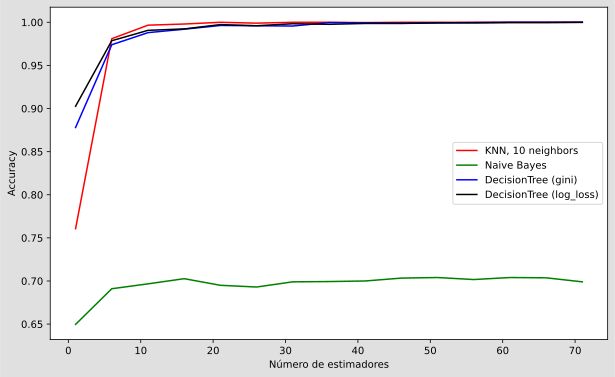

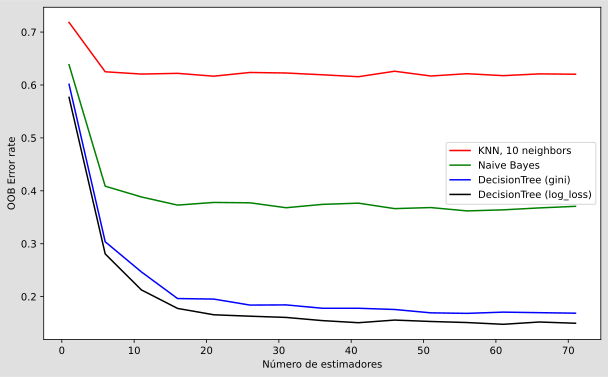

In [29]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

max_estimators = 75
fig_accs = plt.figure(figsize=(10, 6))
fig_oob = plt.figure(figsize=(10, 6))

colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
i = 0

for name, clf in clfs:
    accs_test = []
    accs_train = []
    oob_error_rates = []
    for n_estimators in range(1, max_estimators+1, 5):
        clf.set_params(n_estimators=n_estimators)
        clf.fit(X_train, Y_train)
        accs_train.append(clf.score(X_train, Y_train))
        accs_test.append(clf.score(X_test, Y_test))
        oob_error_rates.append(1 - clf.oob_score_)
        print(n_estimators)
    
    # Gráfico para accs
    plt.figure(fig_accs.number)
    plt.plot(list(range(1, max_estimators, 5)), accs_train, f'{colors[i]}-', label=name, linestyle='-')

    plt.xlabel('Número de estimadores')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Gráfico para oob_scores
    plt.figure(fig_oob.number)
    plt.plot(list(range(1, max_estimators, 5)), oob_error_rates, f'{colors[i]}-', label=name)
    plt.xlabel('Número de estimadores')
    plt.ylabel('OOB Error rate')
    plt.legend()
    
    print(name)
    i += 1

plt.show()

##### Best model

In [78]:
model = BaggingClassifier(n_estimators=80, estimator=DecisionTreeClassifier(criterion='log_loss'), oob_score=True, n_jobs=-1)
model.fit(X_train, Y_train)

print(f"Number of mislabeled points out of a total {X_train.shape[0]} points : {(Y_train != model.predict(X_train)).sum()}")
print(f"Accuracy: {model.score(X_train, Y_train)}")

print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(Y_test != model.predict(X_test)).sum()}")
print(f"Accuracy: {model.score(X_test, Y_test)}")

Number of mislabeled points out of a total 3000 points : 0
Accuracy: 1.0
Number of mislabeled points out of a total 2000 points : 279
Accuracy: 0.8605


1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
KNN, 10 neighbors
1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
Naive Bayes
1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
DecisionTree (gini)
1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
DecisionTree (log_loss)


<Figure size 1000x600 with 0 Axes>

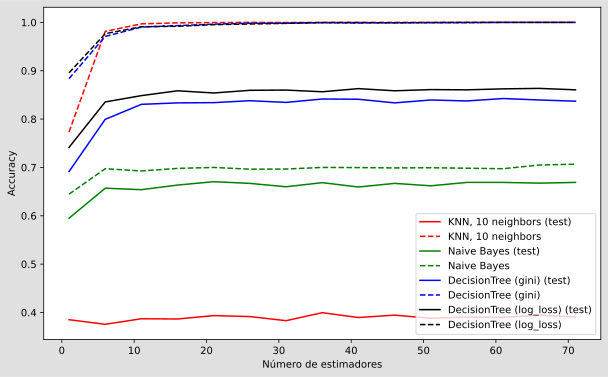

In [31]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

max_estimators = 75
fig_accs = plt.figure(figsize=(10, 6))
fig_oob = plt.figure(figsize=(10, 6))

colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
i = 0

for name, clf in clfs:
    accs_test = []
    accs_train = []
    oob_error_rates = []
    for n_estimators in range(1, max_estimators+1, 5):
        clf.set_params(n_estimators=n_estimators)
        clf.fit(X_train, Y_train)
        accs_train.append(clf.score(X_train, Y_train))
        accs_test.append(clf.score(X_test, Y_test))
        oob_error_rates.append(1 - clf.oob_score_)
        print(n_estimators)
    
    # Gráfico para accs
    plt.figure(fig_accs.number)
    plt.plot(list(range(1, max_estimators, 5)), accs_test, f'{colors[i]}-', label=name + " (test)")
    plt.plot(list(range(1, max_estimators, 5)), accs_train, f'{colors[i]}-', label=name, linestyle='--')

    plt.xlabel('Número de estimadores')
    plt.ylabel('Accuracy')
    plt.legend()
    
    print(name)
    i += 1

plt.show()

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfs = [
    (
        "RF, depth=5, gini, max_f=sqrt", 
        RandomForestClassifier(max_depth=5, random_state=0, max_features='sqrt', oob_score=True, n_jobs=-1)
        ),
    (
        "RF, depth=25, gini, max_f=sqrt", 
        RandomForestClassifier(max_depth=25, random_state=0, max_features='sqrt', oob_score=True, n_jobs=-1)
        ),
    (
        "RF, depth=None, gini, max_f=sqrt", 
        RandomForestClassifier(max_depth=None, criterion='gini',max_features='sqrt', random_state=0, oob_score=True, n_jobs=-1)
        ),
    (
        "RF, depth=None, gini, max_f=0.5", 
        RandomForestClassifier(max_depth=None, criterion='gini', max_features=0.5, random_state=0, oob_score=True, n_jobs=-1)
        ),
    (
        "RF, depth=None, log_loss, max_f=0.25", 
        RandomForestClassifier(max_depth=None, criterion='log_loss', max_features=0.25, random_state=0, oob_score=True, n_jobs=-1)
        )
]

RF, depth=5, gini, max_f=sqrt
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
RF, depth=25, gini, max_f=sqrt
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
RF, depth=None, gini, max_f=sqrt
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
RF, depth=None, gini, max_f=0.5
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
RF, depth=None, log_loss, max_f=0.25
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151


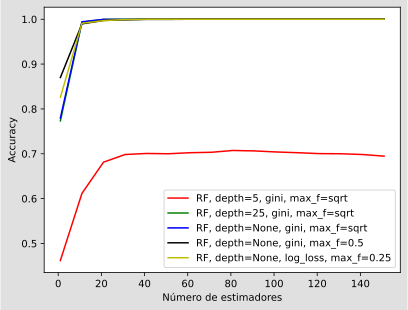

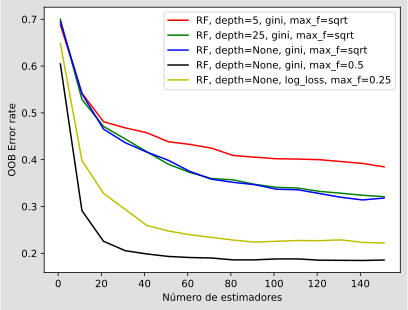

In [33]:
max_estimators = 160
colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
i = 0

for name, rf in rfs:
    print(name)
    accs_train = []
    accs_test = []
    oob_error_rates = []
    for n_estimators in range(1, max_estimators+1, 10):
        rf.set_params(n_estimators=n_estimators)
        rf.fit(X_train, Y_train)
        accs_train.append(rf.score(X_train, Y_train))
        accs_test.append(rf.score(X_test, Y_test))
        oob_error_rates.append(1 - rf.oob_score_)
        print(n_estimators)
    
    # Gráfico para accs
    plt.figure(fig_accs.number)
    plt.plot(list(range(1, max_estimators, 10)), accs_train, f'{colors[i]}-', label=name)
    plt.xlabel('Número de estimadores')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Gráfico para oob_scores
    plt.figure(fig_oob.number)
    plt.plot(list(range(1, max_estimators, 10)), oob_error_rates, f'{colors[i]}-', label=name)
    plt.xlabel('Número de estimadores')
    plt.ylabel('OOB Error rate')
    plt.legend()
    
    i += 1

plt.show()

##### Best model

In [83]:
model = RandomForestClassifier(n_estimators=150, max_depth=None, criterion='gini', max_features=0.5, random_state=0, oob_score=True, n_jobs=-1)
model.fit(X_train, Y_train)

print(f"Number of mislabeled points out of a total {X_train.shape[0]} points : {(Y_train != model.predict(X_train)).sum()}")
print(f"Accuracy: {model.score(X_train, Y_train)}")

print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(Y_test != model.predict(X_test)).sum()}")
print(f"Accuracy: {model.score(X_test, Y_test)}")

Number of mislabeled points out of a total 3000 points : 0
Accuracy: 1.0
Number of mislabeled points out of a total 2000 points : 352
Accuracy: 0.824


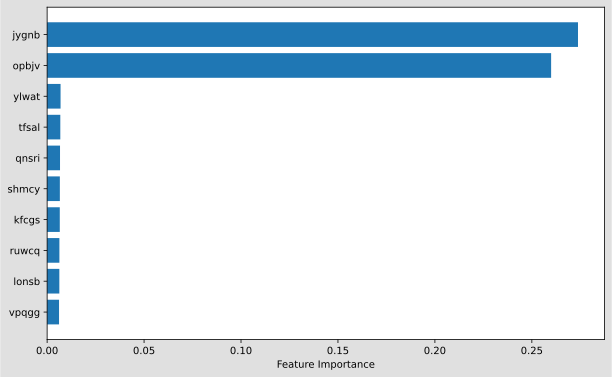

In [101]:
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
# plot hbar of the 10 most important features
plt.barh(range(10), feature_importances[indices[:10][::-1]], align='center')
plt.yticks(range(10), train.columns[:-1][indices[:10][::-1]])
plt.xlabel('Feature Importance')
plt.show()

RF, depth=5, gini, max_f=sqrt
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
RF, depth=25, gini, max_f=sqrt
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
RF, depth=None, gini, max_f=sqrt
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
RF, depth=None, gini, max_f=0.5
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
RF, depth=None, log_loss, max_f=0.25
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151


<Figure size 1600x1000 with 0 Axes>

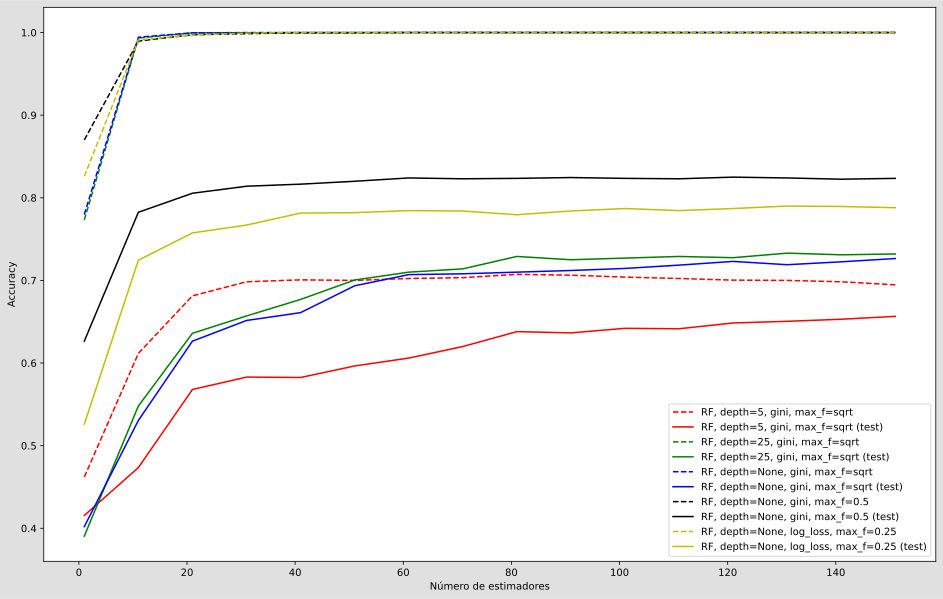

In [35]:
max_estimators = 160
colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
i = 0

fig_accs = plt.figure(figsize=(16, 10))
fig_oob = plt.figure(figsize=(16, 10))

for name, rf in rfs:
    print(name)
    accs_train = []
    accs_test = []
    oob_error_rates = []
    for n_estimators in range(1, max_estimators+1, 10):
        rf.set_params(n_estimators=n_estimators)
        rf.fit(X_train, Y_train)
        accs_train.append(rf.score(X_train, Y_train))
        accs_test.append(rf.score(X_test, Y_test))
        oob_error_rates.append(1 - rf.oob_score_)
        print(n_estimators)
    
    # Gráfico para accs
    plt.figure(fig_accs.number)
    plt.plot(list(range(1, max_estimators, 10)), accs_train, f'{colors[i]}--', label=name)
    plt.plot(list(range(1, max_estimators, 10)), accs_test, f'{colors[i]}-', label=f'{name} (test)')
    plt.xlabel('Número de estimadores')
    plt.ylabel('Accuracy')
    plt.legend()
    
    i += 1

plt.show()

## AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ab_model = AdaBoostClassifier(n_estimators=10, random_state=0)

ab_model.fit(X_train, Y_train)

y_pred_ab = ab_model.predict(X_test)

accuracy_ab = accuracy_score(Y_test, y_pred_ab)
print(f"Accuracy: {accuracy_ab}")


Accuracy: 0.718


In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clfs = [
    ("DT, depth=1, discrete", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), algorithm="SAMME")),
    ("DT, depth=3, discrete", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), algorithm="SAMME")),
    ("DT, depth=4, discrete", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4), algorithm="SAMME")),
    ("DT, depth=1, real", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), algorithm="SAMME.R")),
    ("DT, depth=3, real", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), algorithm="SAMME.R"))
]

1
11
21
31
41
51
61
71
81
91
DT, depth=1, discrete
1
11
21
31
41
51
61
71
81
91
DT, depth=3, discrete
1
11
21
31
41
51
61
71
81
91
DT, depth=4, discrete
1
11
21
31
41
51
61
71
81
91
DT, depth=1, real
1
11
21
31
41
51
61
71
81
91
DT, depth=3, real


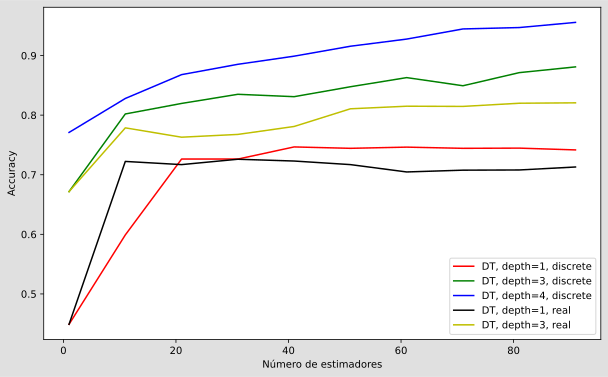

In [38]:
import warnings
#warnings.filterwarnings("ignore")
max_estimators = 100
fig = plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
i = 0
for name, clf in clfs:
    accs_train = []
    accs_test = []
    for n_estimators in range(1, max_estimators+1, 10):
        clf.set_params(n_estimators=n_estimators)
        clf.fit(X_train, Y_train)
        accs_train.append(clf.score(X_train, Y_train))
        accs_test.append(clf.score(X_test, Y_test))
        print(n_estimators)
    
    plt.plot(list(range(1, max_estimators, 10)), accs_train, f'{colors[i]}-', label=name)
    plt.xlabel('Número de estimadores')
    plt.ylabel('Accuracy')
    plt.legend()
    print(name)
    
    i += 1

1
11
21
31
41
51
61
71
81
91
DT, depth=1, discrete
1
11
21
31
41
51
61
71
81
91
DT, depth=3, discrete
1
11
21
31
41
51
61
71
81
91
DT, depth=4, discrete
1
11
21
31
41
51
61
71
81
91
DT, depth=1, real
1
11
21
31
41
51
61
71
81
91
DT, depth=3, real


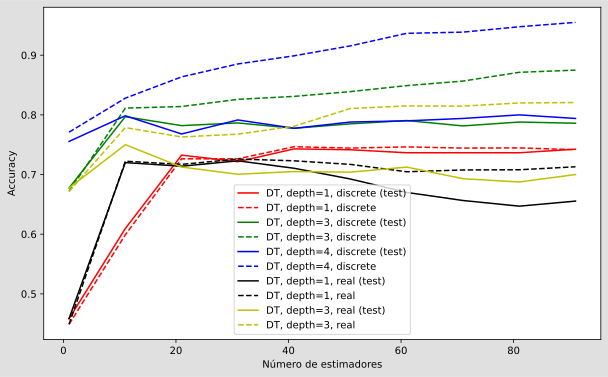

In [39]:
import warnings
#warnings.filterwarnings("ignore")
max_estimators = 100
fig = plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
i = 0
for name, clf in clfs:
    accs_train = []
    accs_test = []
    for n_estimators in range(1, max_estimators+1, 10):
        clf.set_params(n_estimators=n_estimators)
        clf.fit(X_train, Y_train)
        accs_train.append(clf.score(X_train, Y_train))
        accs_test.append(clf.score(X_test, Y_test))
        print(n_estimators)
    
    plt.plot(list(range(1, max_estimators, 10)), accs_test, f'{colors[i]}-', label=name + " (test)")
    plt.plot(list(range(1, max_estimators, 10)), accs_train, f'{colors[i]}-', label=name, linestyle='--')
    plt.xlabel('Número de estimadores')
    plt.ylabel('Accuracy')
    plt.legend()
    print(name)
    
    i += 1

##### Best model

In [40]:
model = AdaBoostClassifier(n_estimators=250, estimator=DecisionTreeClassifier(max_depth=5), algorithm="SAMME")
model.fit(X_train, Y_train)

print(f"Number of mislabeled points out of a total {X_train.shape[0]} points : {(Y_train != model.predict(X_train)).sum()}")
print(f"Accuracy: {model.score(X_train, Y_train)}")

print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(Y_test != model.predict(X_test)).sum()}")
print(f"Accuracy: {model.score(X_test, Y_test)}")

Number of mislabeled points out of a total 3000 points : 0
Accuracy: 1.0
Number of mislabeled points out of a total 2000 points : 385
Accuracy: 0.8075


## Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

clfs = [
    ("GB, lr=0.1, depth=3, max_f=0.5, subs=1", GradientBoostingClassifier(learning_rate=0.1, max_depth=3, max_features=0.5, subsample=1, random_state=0)),
    ("GB, lr=0.3, depth=3, max_f=sqrt, subs=0.5", GradientBoostingClassifier(learning_rate=0.3, max_depth=3, max_features="sqrt", subsample=0.5, random_state=0)),
    ("GB, lr=0.1, depth=5, max_f=0.5, subs=0.8", GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_features=0.5, subsample=0.8, random_state=0)),
    ("GB, lr=0.3, depth=5, max_f=log2, subs=0.5", GradientBoostingClassifier(learning_rate=0.3, max_depth=5, max_features="log2", subsample=0.5, random_state=0)),
]

1
11
21
31
41
51
61
71
81
91
101
111
1
11
21
31
41
51
61
71
81
91
101
111
1
11
21
31
41
51
61
71
81
91
101
111
1
11
21
31
41
51
61
71
81
91
101
111


<Figure size 1000x600 with 0 Axes>

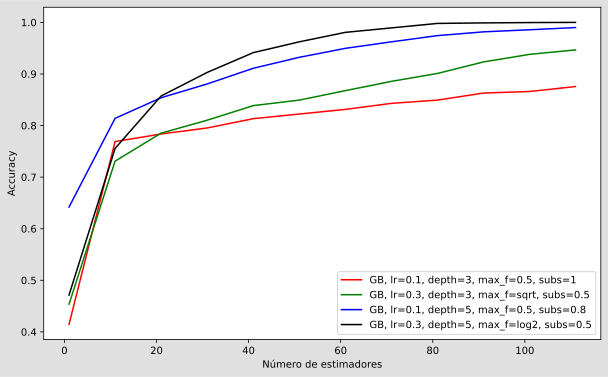

In [42]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

max_estimators = 120
fig_accs = plt.figure(figsize=(10, 6))
fig_oob = plt.figure(figsize=(10, 6))

colors = ['r', 'g', 'b', 'k', 'y']
i = 0

for name, clf in clfs:
    accs_test = []
    accs_train = []
    for n_estimators in range(1, max_estimators+1, 10):
        clf.set_params(n_estimators=n_estimators)
        clf.fit(X_train, Y_train)
        accs_train.append(clf.score(X_train, Y_train))
        accs_test.append(clf.score(X_test, Y_test))
        print(n_estimators)

    # Gráfico para accs
    plt.figure(fig_accs.number)
    plt.plot(list(range(1, max_estimators, 10)), accs_train, f'{colors[i]}-', label=name)

    plt.xlabel('Número de estimadores')
    plt.ylabel('Accuracy')
    plt.legend()

    i += 1
plt.show()

1
11
21
31
41
51
61
71
81
91
101
111
1
11
21
31
41
51
61
71
81
91
101
111
1
11
21
31
41
51
61
71
81
91
101
111
1
11
21
31
41
51
61
71
81
91
101
111


<Figure size 1000x600 with 0 Axes>

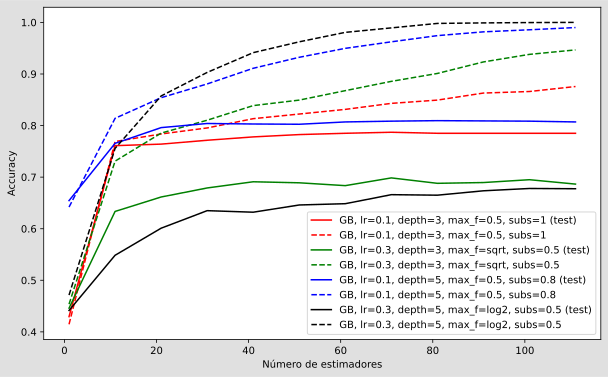

In [43]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

max_estimators = 120
fig_accs = plt.figure(figsize=(10, 6))
fig_oob = plt.figure(figsize=(10, 6))

colors = ['r', 'g', 'b', 'k', 'y']
i = 0

for name, clf in clfs:
    accs_test = []
    accs_train = []
    for n_estimators in range(1, max_estimators+1, 10):
        clf.set_params(n_estimators=n_estimators)
        clf.fit(X_train, Y_train)
        accs_train.append(clf.score(X_train, Y_train))
        accs_test.append(clf.score(X_test, Y_test))
        print(n_estimators)

    # Gráfico para accs
    plt.figure(fig_accs.number)
    plt.plot(list(range(1, max_estimators, 10)), accs_test, f'{colors[i]}-', label=name + " (test)")
    plt.plot(list(range(1, max_estimators, 10)), accs_train, f'{colors[i]}-', label=name, linestyle='--')

    plt.xlabel('Número de estimadores')
    plt.ylabel('Accuracy')
    plt.legend()

    i += 1
plt.show()

##### Best model

In [44]:
model = GradientBoostingClassifier(n_estimators=120, learning_rate=0.1, max_depth=5, max_features=0.5, subsample=0.8, random_state=0)
model.fit(X_train, Y_train)

print(f"Number of mislabeled points out of a total {X_train.shape[0]} points : {(Y_train != model.predict(X_train)).sum()}")
print(f"Accuracy: {model.score(X_train, Y_train)}")

print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(Y_test != model.predict(X_test)).sum()}")
print(f"Accuracy: {model.score(X_test, Y_test)}")

Number of mislabeled points out of a total 3000 points : 21
Accuracy: 0.993
Number of mislabeled points out of a total 2000 points : 384
Accuracy: 0.808
